In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('/engram/nklab/hossein/recurrent_models/BLT_models/')
!pwd

#pip install git+https://github.com/allefeld/pytikz

from pathlib import Path

from torch import nn

from models.build_model import build_model
from tikz_visualizer import *

/engram/nklab/hossein/recurrent_models/BLT_models


## Example usage

In [2]:
pic = TikzModelVisualizer(layer_names=["Layer 1", "Layer 2"])
pic.draw_layer_connection(0, -1, has_xshift=False)  # input -> layer 1
pic.draw_layer_connection(1, 0)  # layer 1 -> layer 2
pic.draw_layer_connection(0, 1)  # layer 2 -> layer 1
pic.draw_layer_connection(0, 0)  # layer 1 -> layer 1
pic.draw_layer_connection(2, 1, has_xshift=False)  # layer 2 -> output

pic.annotate_layer_text(-1, "This is a test")
pic.annotate_layer_param(1, nn.Conv2d(32, 64, 5), post_pre=(1, 0))

pic.annotate_layer_shape(-1, (3, 32, 32))

print(pic.get_picture().code())

# pic.get_picture().write_image("test.pdf")
pic  # renders in notebook

\begin{tikzpicture}[thick,auto,node distance=2cm]
\tikzset{layerstyle/.style={rectangle,rounded corners=15pt,fill=white,draw=black,line width=1pt,minimum width=1cm,minimum height=1cm,text centered,font={\Large \bfseries \sffamily},inner xsep=1em,outer sep=0,scale=2}}
\tikzset{graybg/.style={fill=lightgray}}
\tikzset{conn/.style={->, >=stealth,line width=3pt,draw,inner sep=10pt}}
\tikzset{code/.style={font={\Large \tt}}}
\definecolor{ff1}{rgb}{0, 0, 0}
\definecolor{ff2}{rgb}{0.5, 0.5, 0.5}
\definecolor{ff3}{rgb}{0.75, 0.75, 0.75}
\definecolor{fb1}{rgb}{0.8, 0.2, 0.2}
\definecolor{fb2}{rgb}{0.9, 0.6, 0.6}
\definecolor{fb3}{rgb}{0.95, 0.8, 0.8}
\definecolor{rec}{rgb}{0.1, 0.5, 0.8}
\node[layerstyle, graybg] (Readout) {Readout};
\node[layerstyle,below of=Readout] (Layer 2) {Layer 2};
\node[layerstyle,below of=Layer 2] (Layer 1) {Layer 1};
\node[layerstyle, graybg,below of=Layer 1] (Input) {Input};
\draw[conn,color=ff1] (Input) to (Layer 1);
\draw[conn,color=ff1] (Layer 1.north) ++ (-10pt, 

FileNotFoundError: [Errno 2] No such file or directory: 'xelatex'

## Plotting BLT model parameters

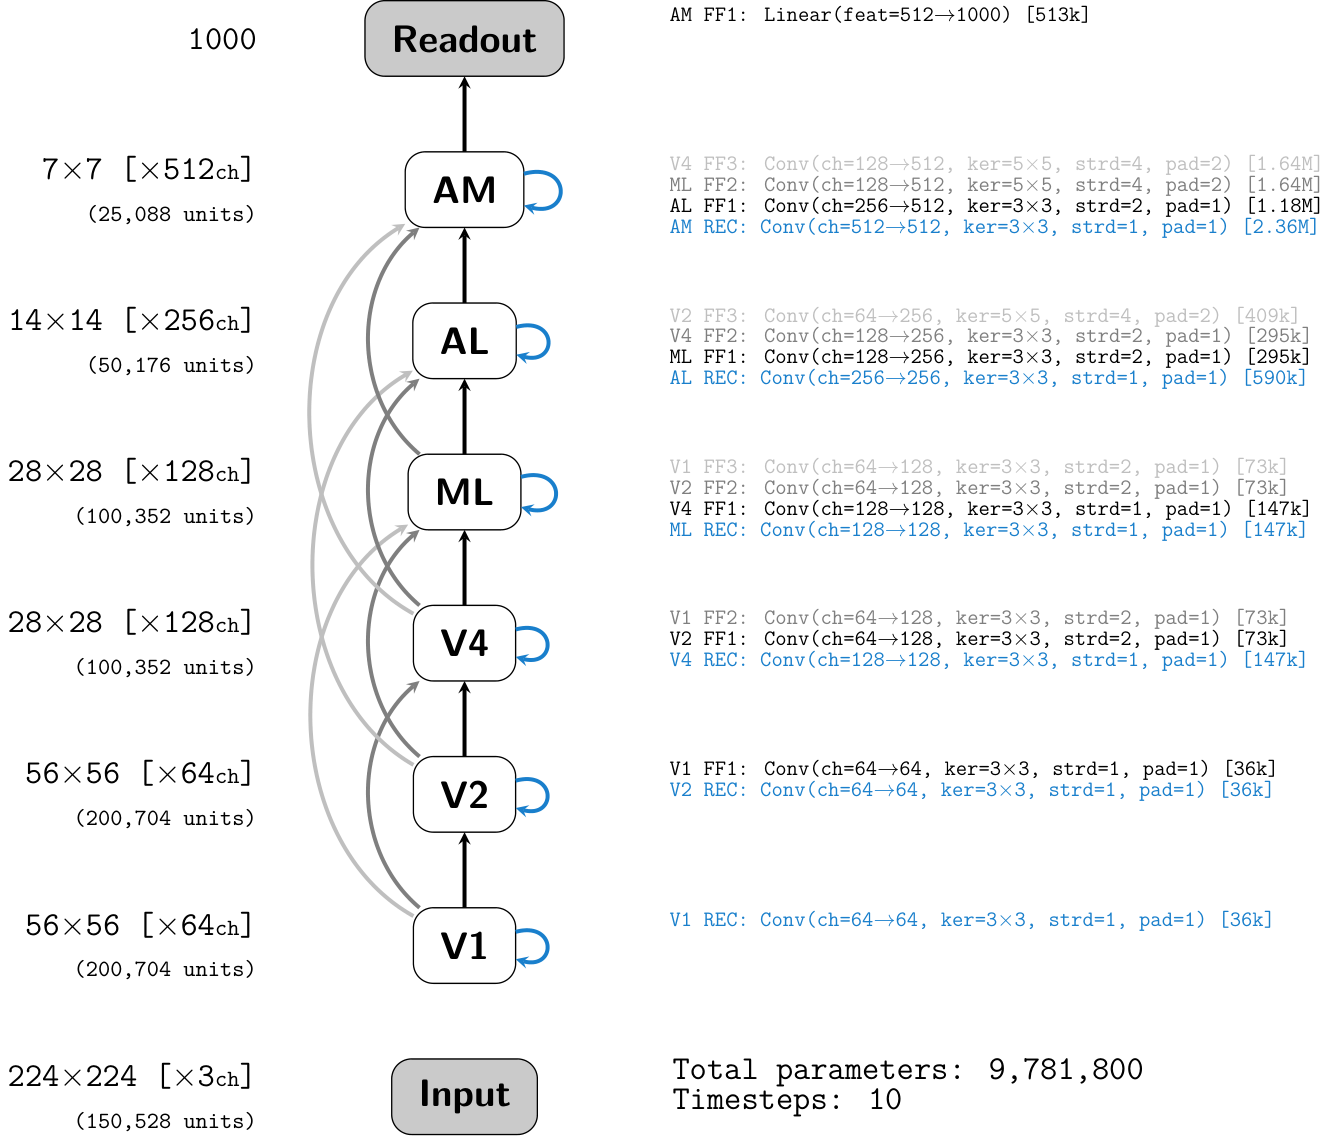

In [24]:
model = build_model("blt_b3l", verbose=False)
pic = visualize_blt(model)
pic

# Example computation graph

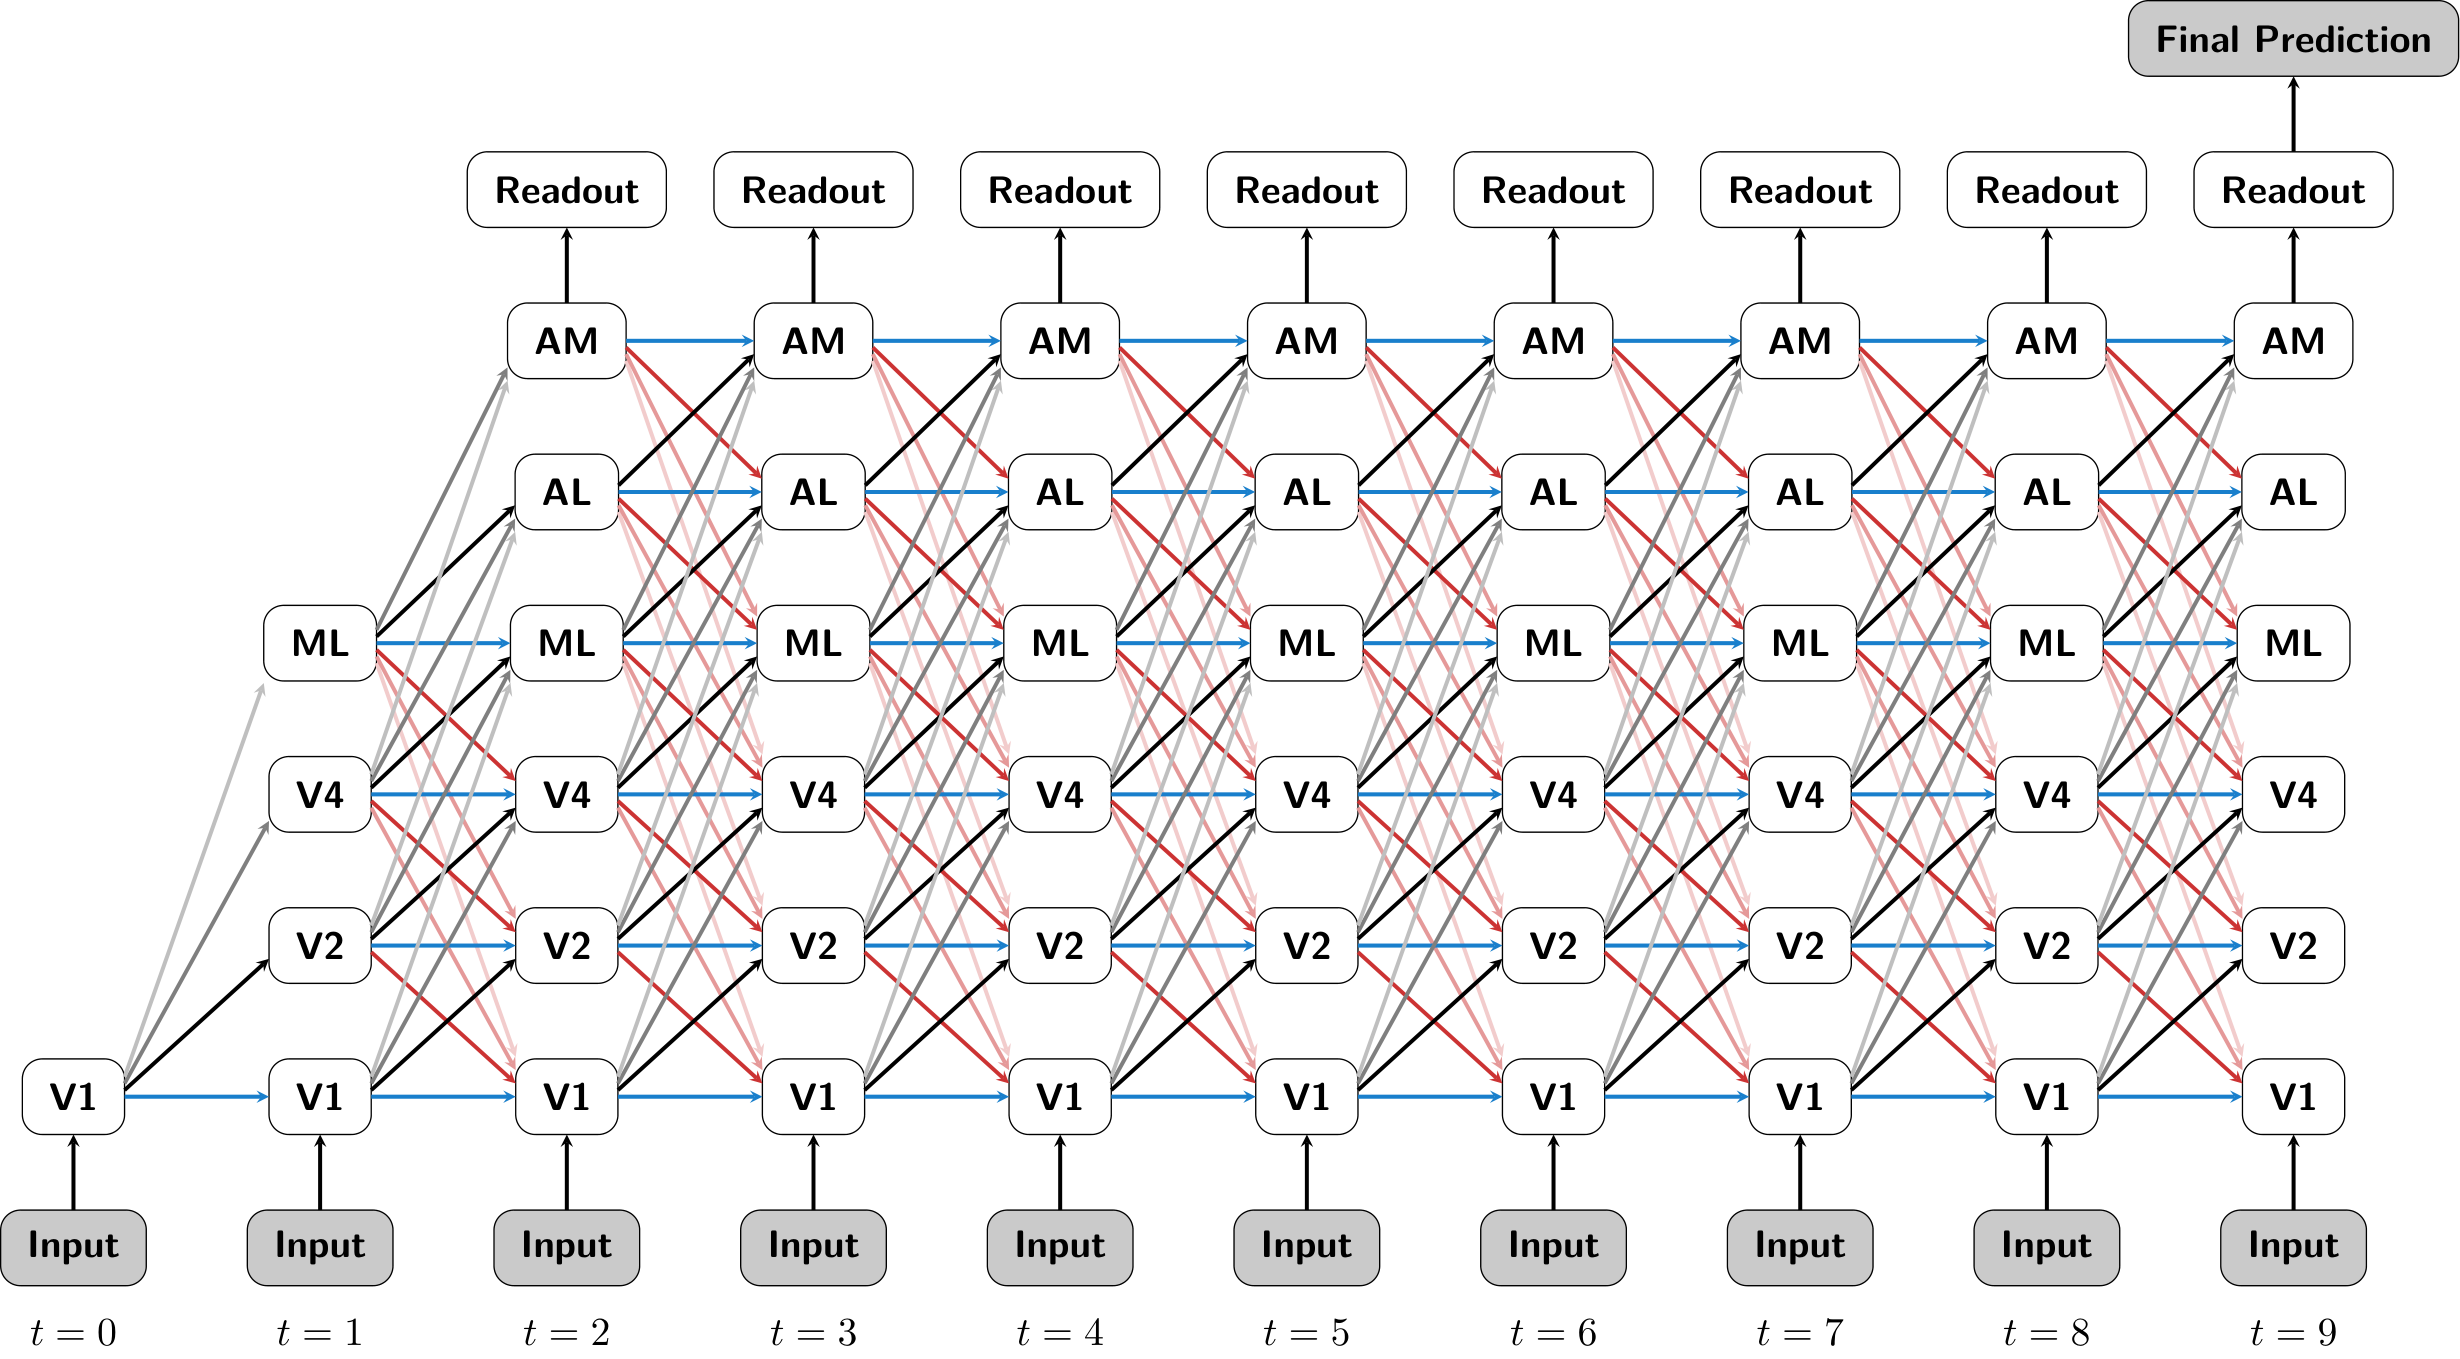

In [30]:
model = build_model("blt_b3lt3", verbose=False)
TikzComputationGraphVisualizer(model, scale=2)

NOTE: I honestly have NO IDEA why the first three "t = ..." render weird. If you save to file it shows fine. And in another notebook it shows fine.

## Save all BLT model combinations

In [31]:
from models.blt import get_all_blt_model_names
blt_combinations = get_all_blt_model_names()

def iter_blt_combinations():
    # for num_layers, layer_names in [(6, ["V1", "V2", "V4", "ML", "AL", "AM"]), (5, None), (4, None)]:
    for num_layers, layer_names in [(6, ["V1", "V2", "V4", "ML", "AL", "AM"])]:
        if layer_names is None:
            layer_names = [f"L{i+1}" for i in range(num_layers)]

        for blt in blt_combinations:
            yield num_layers, layer_names, blt

In [10]:
params_parent = Path("visualizations/model_params")
params_parent.mkdir(parents=True, exist_ok=True)
comp_graph_parent = Path("visualizations/comp_graph")
comp_graph_parent.mkdir(parents=True, exist_ok=True)

for num_layers, layer_names, blt in iter_blt_combinations():
    params_dir = params_parent / f"{num_layers}layer"
    params_dir.mkdir(exist_ok=True)

    comp_graph_dir = comp_graph_parent / f"{num_layers}layer"
    comp_graph_dir.mkdir(exist_ok=True)

    model_config = build_model(f"blt_{blt}", num_layers=num_layers, layer_names=layer_names)
    model = BLTNet(model_config)
    filename = f"{blt}.pdf"
    visualize_blt(model).get_picture().write_image(params_dir / filename)
    TikzComputationGraphVisualizer(model).get_picture().write_image(comp_graph_dir / filename)